In [1]:
# import the necessary packages
from datetime import datetime
from datetime import timedelta
import mplfinance as mpf
import pandas_ta as ta
import yfinance as yf

In [2]:
# define the start and end dates for the history request
end_date = datetime(year=2024, month=9, day=1)
start_date = end_date - timedelta(days=90)

In [3]:
# define the ticker we are interested in
ticker = "NVDA"

# fetch daily OHLVC bars for the ticker
df = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    progress=False
)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-03,113.621002,115.000000,112.002998,115.000000,114.980721,438392000
2024-06-04,115.716003,116.599998,114.044998,116.436996,116.417473,403324000
2024-06-05,118.371002,122.448997,117.468002,122.440002,122.419472,528402000
2024-06-06,124.047997,125.586998,118.320000,120.998001,120.977715,664696000
2024-06-07,119.769997,121.692001,118.022003,120.888000,120.867737,412386000
...,...,...,...,...,...,...
2024-08-26,129.570007,131.259995,124.370003,126.459999,126.449181,331964700
2024-08-27,125.050003,129.199997,123.879997,128.300003,128.289032,303134600
2024-08-28,128.119995,128.330002,122.639999,125.610001,125.599258,448101100


In [4]:
# detect all Doji candles in the dataframe
df["Doji"] = df.ta.cdl_pattern(name="doji")
df[df["Doji"] > 0]

,Open,High,Low,Close,Adj Close,Volume,Doji
Date,,,,,,,
2024-06-26,126.129997,128.119995,122.599998,126.400002,126.389191,362975900,100.0
2024-06-27,124.099998,126.410004,122.919998,123.989998,123.979393,252571700,100.0
2024-07-23,122.779999,124.690002,122.099998,122.589996,122.579514,173911000,100.0
2024-08-06,103.839996,107.709999,100.550003,104.250000,104.241081,409012100,100.0
2024-08-14,118.529999,118.599998,114.070000,118.080002,118.069901,339246400,100.0
2024-08-30,119.529999,121.750000,117.220001,119.370003,119.359795,333751600,100.0


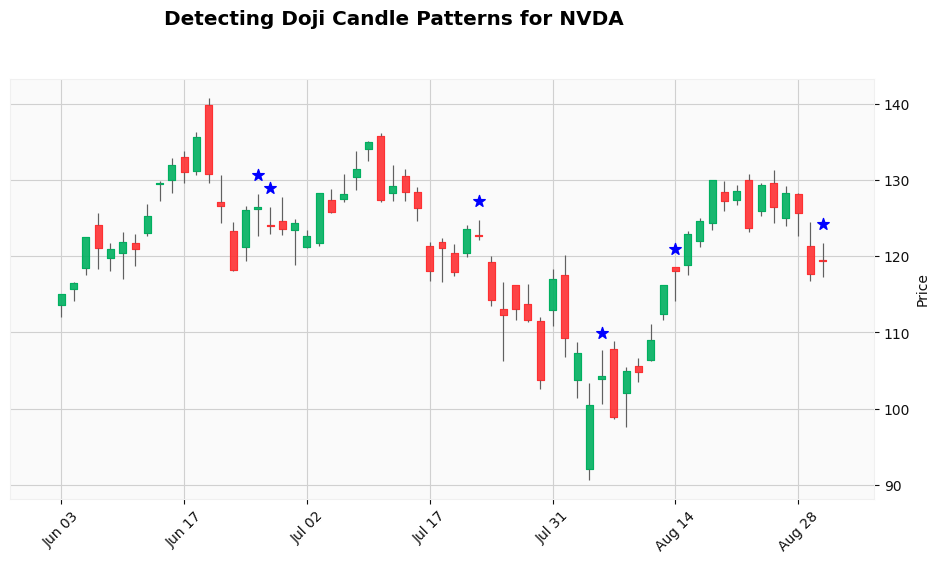

In [5]:
# create a series that we'll use to plot our Doji markers
doji_markers = df.apply(
    lambda row: row["High"] * 1.02 if row["Doji"] > 0 else float("nan"),
    axis=1
)

# construct a scatter plot for the Doji markers
addt_plots = mpf.make_addplot(
    doji_markers,
    type="scatter",
    marker="*",
    markersize=75,
    color="b"
)

# plot the OHLCV bars, along with the Doji candle detections
mpf.plot(
    df,
    figsize=(12, 6),
    addplot=addt_plots,
    type="candle",
    style="yahoo",
    title=f"Detecting Doji Candle Patterns for {ticker}"
)